In [ ]:
import Datos.Data_acq as data
from models import Encoder
from models import Decoder
from models import cVAE
import matplotlib.pyplot as plt
import importlib

In [2]:
import importlib
importlib.reload(data)
x_train, x_test,x_val ,y_train, y_test,y_val, x_train_1, y_train_1 = data.get_mnist_data(dataset="fashion")




Usando fashion como dataset


In [3]:
import importlib
import numpy as np
importlib.reload(Encoder)
importlib.reload(Decoder)

#img_dim=(28,28),condition_dim=(10,),intermediate_dim=128,latent_dim=2
#latent_dim=2, cond_dim=(10,), intermediate_dim=128, original_shape=(28, 28)

en = Encoder.build_enconder(intermediate_dim=128,latent_dim=2)
de = Decoder.build_decoder(intermediate_dim=128,latent_dim=2)


img_sample = np.expand_dims(x_train[0], axis=0)# shape (1, 28, 28)
cond_sample = np.expand_dims(y_train[0], axis=0) 
print(img_sample.shape)
[z, z_mean, z_log_var] = en.predict([img_sample,cond_sample])

img_recons = de.predict([z,cond_sample])





(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [4]:
import tensorflow as tf
from keras.callbacks import EarlyStopping

importlib.reload(cVAE)
original_dim = 28*28
beta = 1.0

train_dataset = tf.data.Dataset.from_tensor_slices(((x_train, y_train), x_train))
#train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128)
train_dataset = train_dataset.batch(128)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

val_dataset = tf.data.Dataset.from_tensor_slices(((x_val, y_val), x_val))
val_dataset = val_dataset.batch(128)


cvae = cVAE.CVAE(encoder=en, decoder=de, original_dim=original_dim, beta=1)
cvae.compile(optimizer=tf.keras.optimizers.Adam())



In [5]:
import visualizaciones.visualizar as vis
#vis.lattent_space_umap(cvae=cvae,dataset=train_dataset)

Epoch 1/10
424/430 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 4.7747 - loss: 65.1370 - reconstruction_loss: 60.3622
Visualizando espacio latente con UMAP en la época 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


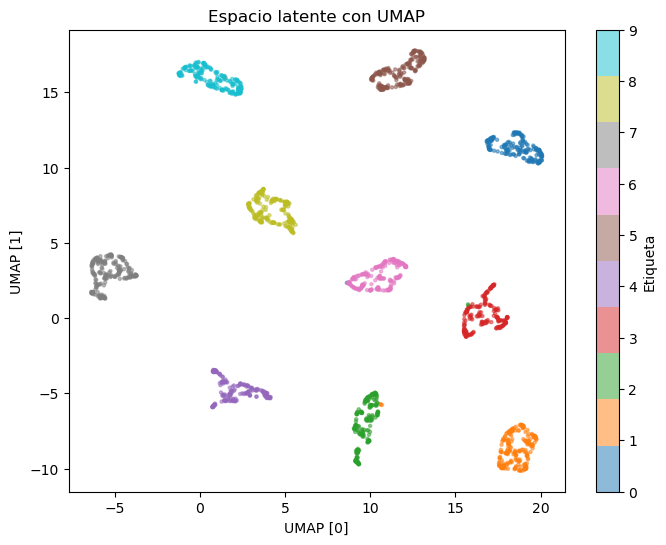

430/430 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - kl_loss: 4.7651 - loss: 64.8000 - reconstruction_loss: 60.0349 - val_kl_loss: 3.5335 - val_loss: 30.5267 - val_reconstruction_loss: 27.0644
Epoch 2/10
423/430 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 3.4689 - loss: 29.4096 - reconstruction_loss: 25.9406
Visualizando espacio latente con UMAP en la época 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


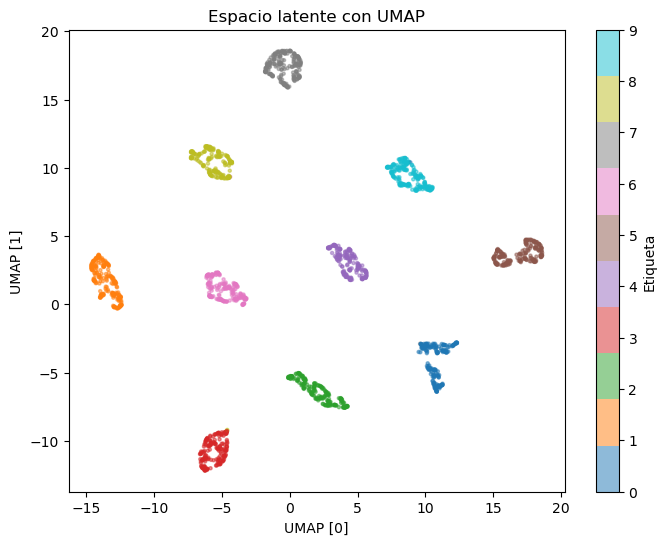

430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - kl_loss: 3.4684 - loss: 29.3957 - reconstruction_loss: 25.9273 - val_kl_loss: 3.4024 - val_loss: 27.9569 - val_reconstruction_loss: 24.6486
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 3.3739 - loss: 27.3591 - reconstruction_loss: 23.9852
Visualizando espacio latente con UMAP en la época 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


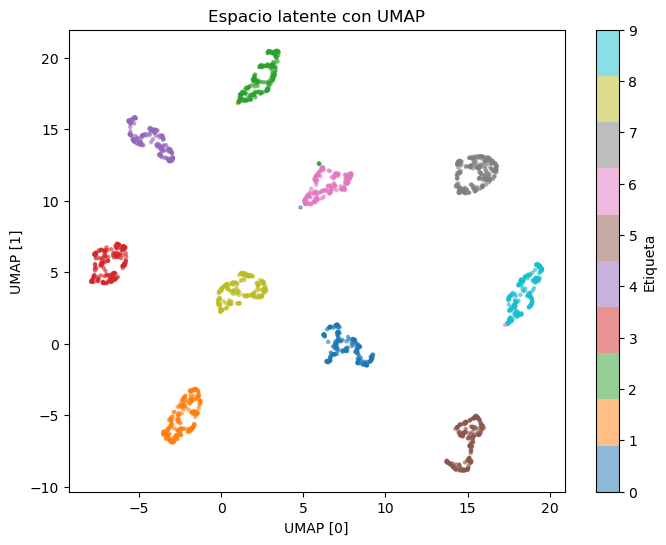

430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - kl_loss: 3.3739 - loss: 27.3585 - reconstruction_loss: 23.9846 - val_kl_loss: 3.3612 - val_loss: 27.1054 - val_reconstruction_loss: 23.8290
Epoch 4/10
426/430 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 3.3133 - loss: 26.5364 - reconstruction_loss: 23.2231
Visualizando espacio latente con UMAP en la época 4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


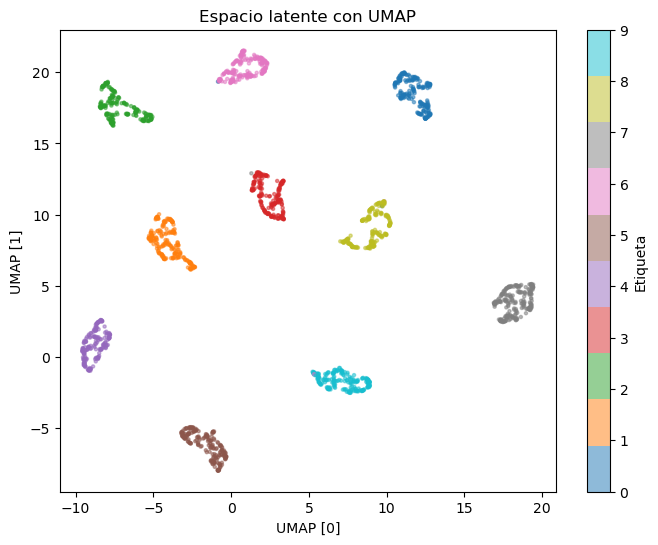

430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - kl_loss: 3.3132 - loss: 26.5341 - reconstruction_loss: 23.2209 - val_kl_loss: 3.3566 - val_loss: 26.2410 - val_reconstruction_loss: 22.9598
Epoch 5/10
424/430 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 3.2673 - loss: 26.0579 - reconstruction_loss: 22.7906
Visualizando espacio latente con UMAP en la época 5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


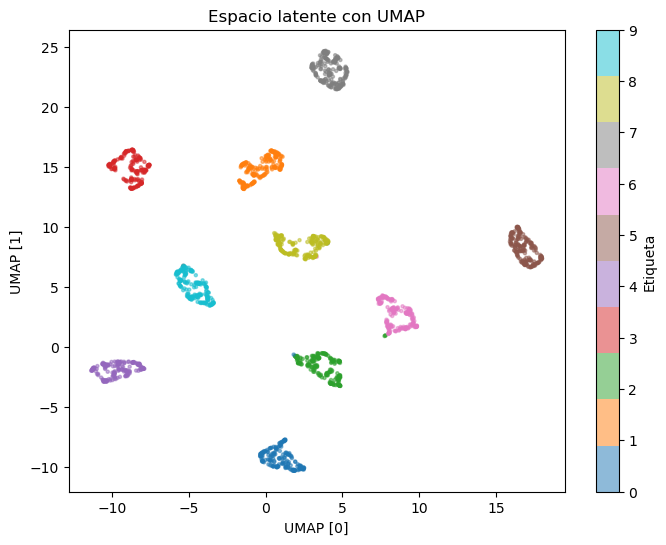

430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - kl_loss: 3.2673 - loss: 26.0553 - reconstruction_loss: 22.7880 - val_kl_loss: 3.1343 - val_loss: 25.9064 - val_reconstruction_loss: 22.8282
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 3.2383 - loss: 25.6547 - reconstruction_loss: 22.4164
Visualizando espacio latente con UMAP en la época 6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


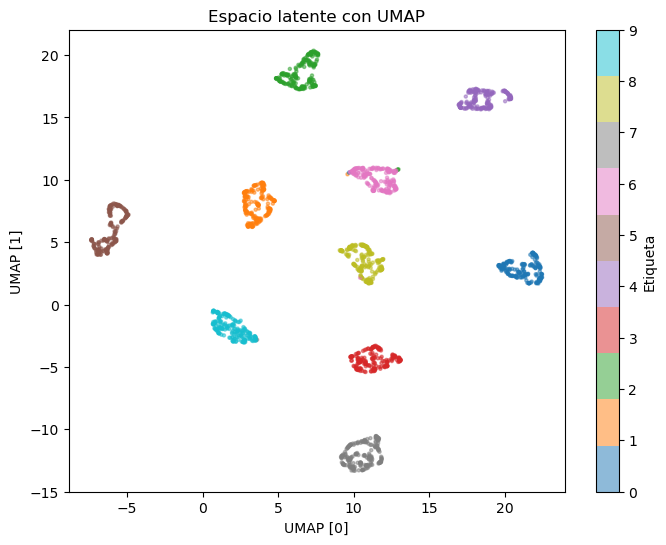

430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - kl_loss: 3.2383 - loss: 25.6544 - reconstruction_loss: 22.4161 - val_kl_loss: 3.2265 - val_loss: 25.7272 - val_reconstruction_loss: 22.5581
Epoch 7/10
426/430 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 3.2140 - loss: 25.3780 - reconstruction_loss: 22.1640
Visualizando espacio latente con UMAP en la época 7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


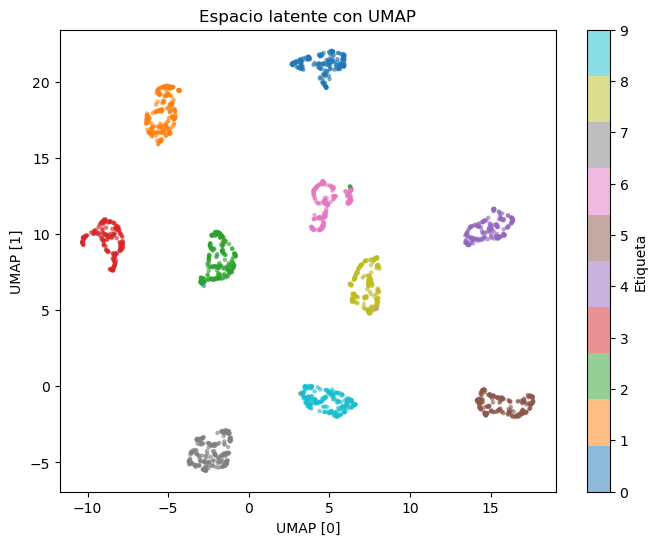

430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - kl_loss: 3.2140 - loss: 25.3767 - reconstruction_loss: 22.1626 - val_kl_loss: 3.1830 - val_loss: 25.3127 - val_reconstruction_loss: 22.1999
Epoch 8/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 3.1943 - loss: 25.1289 - reconstruction_loss: 21.9345
Visualizando espacio latente con UMAP en la época 8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


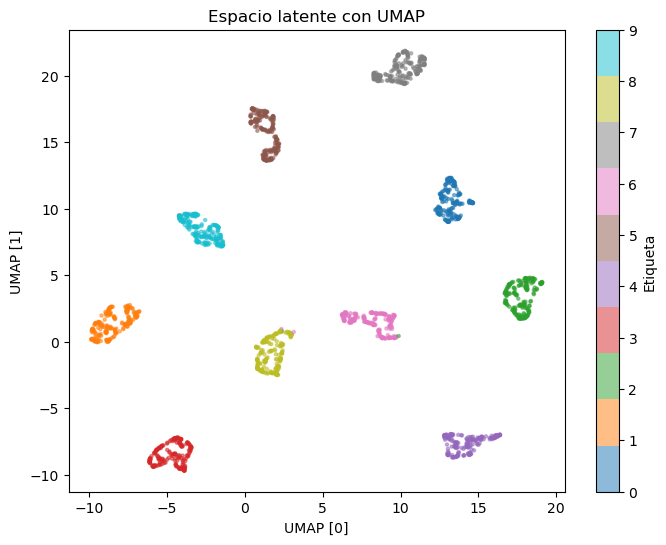

430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - kl_loss: 3.1944 - loss: 25.1287 - reconstruction_loss: 21.9343 - val_kl_loss: 3.1517 - val_loss: 25.3419 - val_reconstruction_loss: 22.2741
Epoch 9/10
423/430 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 3.1859 - loss: 24.9723 - reconstruction_loss: 21.7864
Visualizando espacio latente con UMAP en la época 9
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


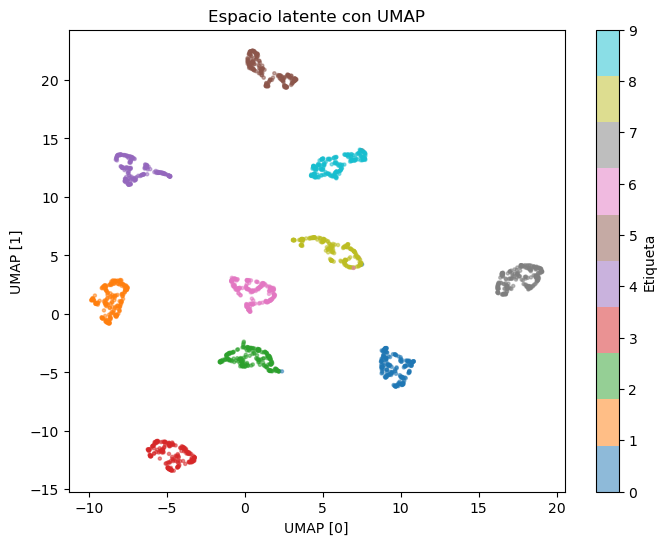

430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - kl_loss: 3.1860 - loss: 24.9704 - reconstruction_loss: 21.7844 - val_kl_loss: 3.2181 - val_loss: 25.0066 - val_reconstruction_loss: 21.8592
Epoch 10/10
425/430 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 3.1826 - loss: 24.8473 - reconstruction_loss: 21.6647
Visualizando espacio latente con UMAP en la época 10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


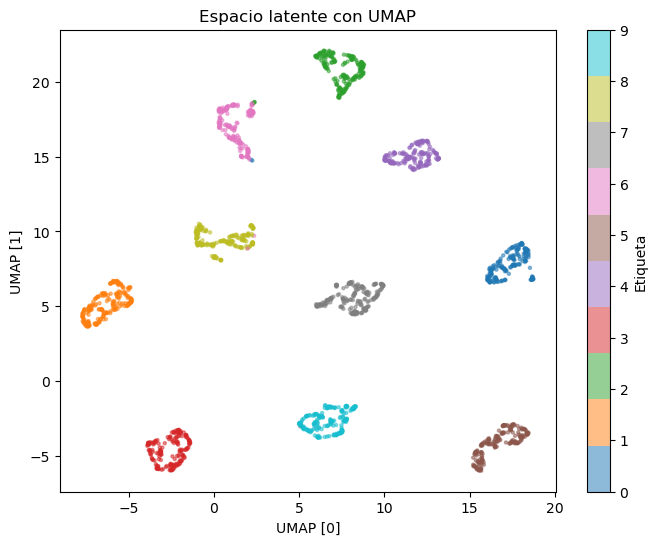

430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - kl_loss: 3.1825 - loss: 24.8456 - reconstruction_loss: 21.6631 - val_kl_loss: 3.1849 - val_loss: 25.0346 - val_reconstruction_loss: 21.9098


In [6]:
from keras.callbacks import Callback

class LatentSpaceUMAPCallback(Callback):
    def __init__(self, cvae, dataset, max_samples=2000):
        super().__init__()
        self.cvae = cvae
        self.dataset = dataset
        self.max_samples = max_samples

    def on_epoch_end(self, epoch, logs=None):
        print(f"\nVisualizando espacio latente con UMAP en la época {epoch+1}")
        vis.lattent_space_umap(self.cvae, self.dataset, max_samples=self.max_samples)

# Al entrenar el modelo, agrega el callback:
umap_callback = LatentSpaceUMAPCallback(cvae, train_dataset, max_samples=2000)

cvae.fit(
    train_dataset,
    epochs=10,
    batch_size=128,
    validation_data=val_dataset,
    callbacks=[early_stopping, umap_callback]
)

In [7]:
'''
from keras.callbacks import Callback

class LatentSpaceTSNECallback(Callback):
    def __init__(self, cvae, dataset, max_samples=2000):
        super().__init__()
        self.cvae = cvae
        self.dataset = dataset
        self.max_samples = max_samples

    def on_epoch_end(self, epoch, logs=None):
        print(f"\nVisualizando espacio latente con t-SNE en la época {epoch+1}")
        vis.lattent_space_tsne(self.cvae, self.dataset, max_samples=self.max_samples)

# Al entrenar el modelo, agrega el callback:
tsne_callback = LatentSpaceTSNECallback(cvae, train_dataset, max_samples=2000)

cvae.fit(
    train_dataset,
    epochs=10,
    batch_size=128,
    validation_data=val_dataset,
    callbacks=[early_stopping, tsne_callback]
)
'''

'\nfrom keras.callbacks import Callback\n\nclass LatentSpaceTSNECallback(Callback):\n    def __init__(self, cvae, dataset, max_samples=2000):\n        super().__init__()\n        self.cvae = cvae\n        self.dataset = dataset\n        self.max_samples = max_samples\n\n    def on_epoch_end(self, epoch, logs=None):\n        print(f"\nVisualizando espacio latente con t-SNE en la época {epoch+1}")\n        vis.lattent_space_tsne(self.cvae, self.dataset, max_samples=self.max_samples)\n\n# Al entrenar el modelo, agrega el callback:\ntsne_callback = LatentSpaceTSNECallback(cvae, train_dataset, max_samples=2000)\n\ncvae.fit(\n    train_dataset,\n    epochs=10,\n    batch_size=128,\n    validation_data=val_dataset,\n    callbacks=[early_stopping, tsne_callback]\n)\n'

In [8]:
#vis.lattent_space_tsne(cvae=cvae,dataset=train_dataset)